In [1]:
import pandas as pd
from io import BytesIO
from zipfile import ZipFile
from urllib.request import urlopen

In [2]:
# year 2023
zip_url = "https://www.mercatoelettrico.org/it/MenuBiblioteca/Documenti/Anno2023.zip"
resp = urlopen(zip_url)
myzip = ZipFile(BytesIO(resp.read()))
df = pd.read_excel(myzip.open(myzip.namelist()[0]), sheet_name=1)
df = df.iloc[:, :3]
df.columns = ["Date", "Hour", "PUN"]
df['Date'] = df['Date'].astype(str)
df['Date'] = pd.to_datetime(df['Date'])
df['Hour'] = pd.to_datetime(df['Hour'], unit='h').dt.strftime('%H:%M')
df['DateTime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Hour'].astype(str))
df.set_index(df['DateTime'], inplace=True, drop=True)
df = df['PUN']
df = df.resample('W').mean()
df

DateTime
2023-01-01    193.144583
2023-01-08    180.349786
2023-01-15    168.410351
2023-01-22    167.752016
2023-01-29    179.864203
2023-02-05    164.306593
2023-02-12    170.285063
2023-02-19    157.088636
2023-02-26    153.388262
2023-03-05    160.351095
2023-03-12    134.299114
2023-03-19    133.044032
2023-03-26    126.847454
2023-04-02    136.327861
Freq: W-SUN, Name: PUN, dtype: float64

### Collecting Historical Pun Prices
using request to collect all historical PUN prices, appending to DataFrame, resampling by week

In [2]:
years = [2005, 2006, 2007, 2008, 2009, 2010, 
         2011, 2012, 2013, 2014, 2015, 2016,
         2017, 2018, 2019, 2020, 2021, 2022]

hist_pun = pd.DataFrame(columns=['Date', 'Hour', 'PUN'])

for year in years: 
    zip_url = f"https://www.mercatoelettrico.org/it/MenuBiblioteca/Documenti/Anno{year}.zip"
    resp = urlopen(zip_url)
    myzip = ZipFile(BytesIO(resp.read()))
    df = pd.read_excel(myzip.open(myzip.namelist()[0]), sheet_name=1)
    df = df.iloc[:, :3]
    df.columns = ['Date', 'Hour', 'PUN']
    hist_pun = pd.concat([hist_pun, df], axis=0)

hist_pun['Date'] = hist_pun['Date'].astype(str)
hist_pun['Date'] = pd.to_datetime(hist_pun['Date'])
hist_pun['Hour'] = pd.to_datetime(hist_pun['Hour'], unit='h').dt.strftime('%H:%M')
hist_pun['DateTime'] = pd.to_datetime(hist_pun['Date'].astype(str) + ' ' + hist_pun['Hour'].astype(str))
hist_pun.set_index(hist_pun['DateTime'], inplace=True, drop=True)
hist_pun = hist_pun['PUN']
hist_pun = hist_pun.resample('W').mean()


In [3]:
hist_pun

DateTime
2005-01-02     27.208582
2005-01-09     49.805366
2005-01-16     74.975781
2005-01-23     66.426183
2005-01-30     62.041754
                 ...    
2022-12-04    352.681796
2022-12-11    363.451550
2022-12-18    361.867230
2022-12-25    216.460940
2023-01-01    194.277136
Freq: W-SUN, Name: PUN, Length: 940, dtype: float64

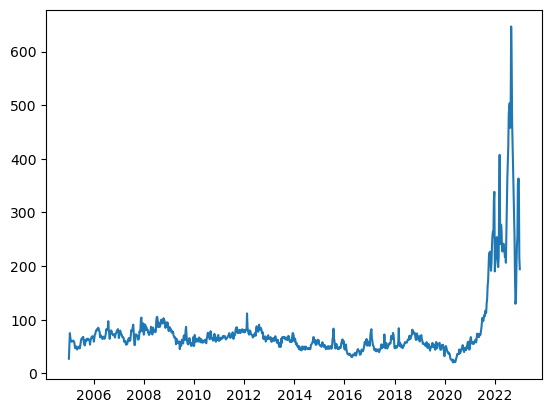

In [4]:
import matplotlib.pyplot as plt
plt.plot(hist_pun)

In [8]:
# save historical data
hist_pun.to_csv('../data/hist_pun.csv')